In [1]:
import pandas
print('pandas',pandas.__version__)
import numpy
print('numpy',numpy.__version__)
import glob
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
import pickle
import time

pandas 0.23.4
numpy 1.13.3


# load data from pickle file

In [2]:
with open("list_of_df_other_notebooks_1553432207.5549905.pkl",'rb') as handl:
    lst_of_df = pickle.load(handl)

In [3]:
len(lst_of_df)

4

In [4]:
df = lst_of_df[0]['df']

In [5]:
print(df.shape)
df.head()

(600, 328)


,CPU 1 times guest,CPU 1 times guest_nice,CPU 1 times idle,CPU 1 times iowait,CPU 1 times irq,CPU 1 times nice,CPU 1 times softirq,CPU 1 times steal,CPU 1 times system,CPU 1 times user,...,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory shared,system virtual memory slab,system virtual memory total,system virtual memory used,time in unix seconds
0,0.0,0.0,62.8,0.6,0.0,0.0,0.0,0.0,12.8,23.8,...,17334272,150708224,1696976896,129146880,18.0,4096,44695552,2096164864,231145472,1.553432e+09
1,0.0,0.0,97.1,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,17346560,150716416,1696976896,129155072,18.0,4096,44732416,2096164864,231124992,1.553432e+09
2,0.0,0.0,94.3,0.0,0.0,0.0,0.0,0.0,0.9,4.7,...,17346560,150716416,1696976896,129155072,18.0,4096,44732416,2096164864,231124992,1.553432e+09
3,0.0,0.0,96.1,0.0,0.0,0.0,0.0,0.0,1.0,2.9,...,17346560,150712320,1697017856,129155072,18.0,4096,44658688,2096164864,231088128,1.553432e+09
4,0.0,0.0,96.2,0.0,0.0,0.0,0.0,0.0,1.0,2.9,...,17346560,150708224,1696890880,129155072,18.0,4096,44654592,2096164864,231219200,1.553432e+09


# drop column if entire column is constant value

In [6]:
# https://stackoverflow.com/questions/39658574/how-to-drop-columns-which-have-same-values-in-all-rows-via-pandas-or-spark-dataf
series_of_unique_values_per_column = df.apply(pandas.Series.nunique)
cols_to_drop = series_of_unique_values_per_column[series_of_unique_values_per_column == 1].index
df = df.drop(cols_to_drop, axis=1)
print(df.shape)
df.head()

(600, 76)


,CPU 1 times idle,CPU 1 times iowait,CPU 1 times softirq,CPU 1 times system,CPU 1 times user,CPU 2 times idle,CPU 2 times iowait,CPU 2 times softirq,CPU 2 times system,CPU 2 times user,...,system virtual memory active,system virtual memory available,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory slab,system virtual memory used,time in unix seconds
0,62.8,0.6,0.0,12.8,23.8,77.1,0.0,0.0,7.8,15.1,...,198971392,1718231040,17334272,150708224,1696976896,129146880,18.0,44695552,231145472,1.553432e+09
1,97.1,0.0,0.0,1.0,2.0,98.1,1.0,0.0,1.0,0.0,...,199041024,1718239232,17346560,150716416,1696976896,129155072,18.0,44732416,231124992,1.553432e+09
2,94.3,0.0,0.0,0.9,4.7,99.1,0.0,0.0,0.0,0.9,...,199041024,1718239232,17346560,150716416,1696976896,129155072,18.0,44732416,231124992,1.553432e+09
3,96.1,0.0,0.0,1.0,2.9,99.0,0.0,0.0,0.0,1.0,...,199110656,1718288384,17346560,150712320,1697017856,129155072,18.0,44658688,231088128,1.553432e+09
4,96.2,0.0,0.0,1.0,2.9,100.0,0.0,0.0,0.0,0.0,...,199110656,1718161408,17346560,150708224,1696890880,129155072,18.0,44654592,231219200,1.553432e+09


# scatter plot per column

In [7]:
def scatter_plot_column(df,col_name):
    if not isinstance(df,pandas.core.frame.DataFrame):
        raise TypeError('ERROR: expected input of type dataframe, got',type(df))
        return None
    print(col_name)
    x=df['time in unix seconds']
    y=df[col_name]
    # https://stackoverflow.com/questions/31126698/differences-between-scipy-stats-linregress-numpy-polynomial-polynomial-polyfi
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    print('r',r_value)
    print('p',p_value)
    print('std error:',std_err)

    _=plt.figure(figsize=(5,4))
    if (abs(1-r_value)<0.01):
        plt.scatter(x,y,label='original')
        plt.plot(x, intercept + slope*x, 'r', label='fitted line')
        linear=True
    else:
        plt.plot_date(x=df['datetime'],y=df[col_name],label='original')
        plt.xticks(rotation=40)
        linear=False
    
    _=plt.ylabel(col_name,fontsize=14)
    _=plt.xlabel('time',fontsize=14)
    plt.show()
    return linear

CPU 1 times idle
r -0.70982660432
p 4.45486745078e-93
std error: 0.00473544281234


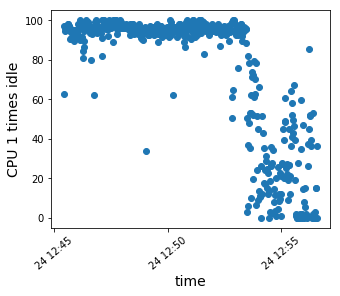

CPU 1 times iowait
r 0.355801187022
p 2.40383852238e-19
std error: 0.000846530379332


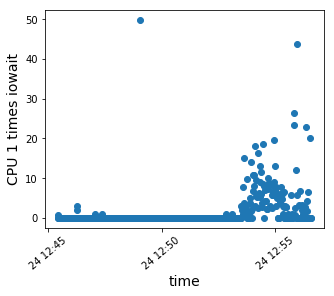

CPU 1 times softirq
r 0.361609240724
p 5.66328413477e-20
std error: 0.000409566606307


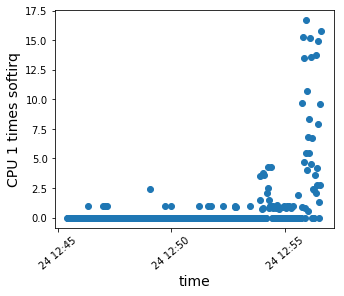

CPU 1 times system
r 0.628111670202
p 3.64076155809e-67
std error: 0.0024426954491


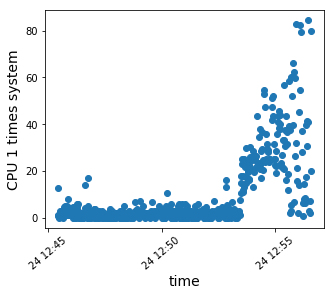

CPU 1 times user
r 0.60397844211
p 6.3595173074e-61
std error: 0.00304335210602


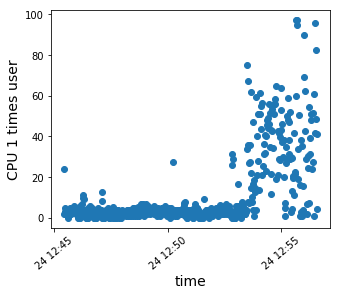

CPU 2 times idle
r -0.692626245271
p 6.67199163404e-87
std error: 0.00499372190548


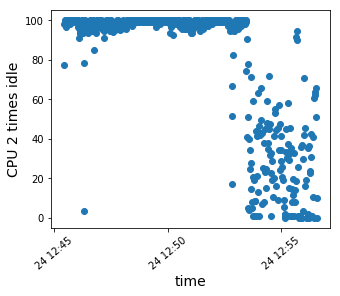

CPU 2 times iowait
r 0.416982778039
p 1.22083438832e-26
std error: 0.00123363063107


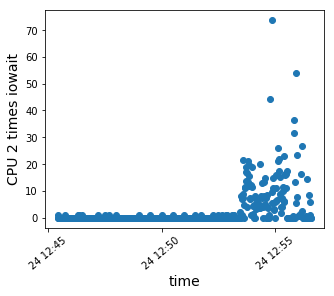

CPU 2 times softirq
r 0.27691644928
p 5.04289293759e-12
std error: 0.000265608426002


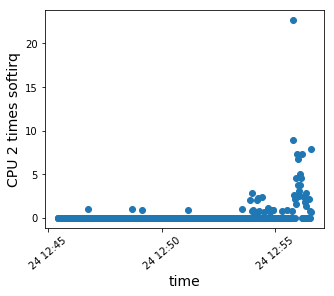

CPU 2 times system
r 0.615374031892
p 8.38083451191e-64
std error: 0.00217049676778


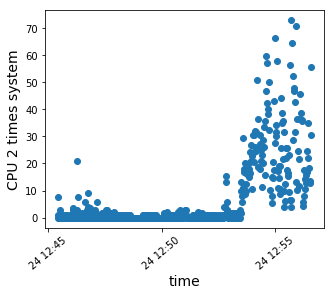

CPU 2 times user
r 0.603201786134
p 9.89691676962e-61
std error: 0.00319100198646


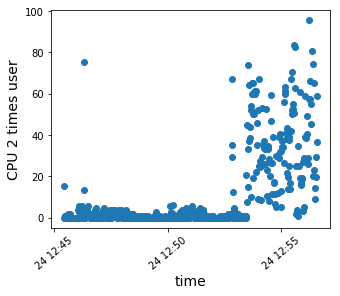

CPU percent for 0
r 0.713490659211
p 1.88131639926e-94
std error: 0.00437115473205


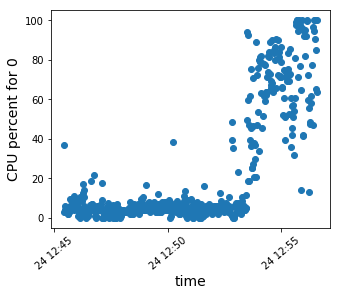

CPU percent for 1
r 0.688916921023
p 1.25707572353e-85
std error: 0.00443770536231


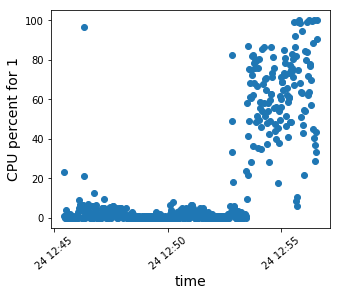

CPU stats ctx_switches
r 0.933057611567
p 1.03572929034e-267
std error: 15.9035609599


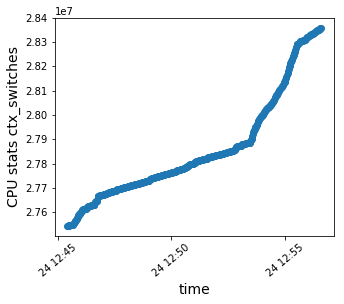

CPU stats interrupts
r 0.925083829356
p 1.24636303775e-253
std error: 7.3516480579


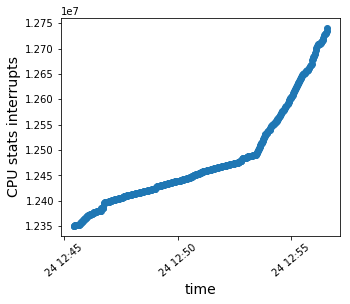

CPU stats soft_interrupts
r 0.958479123149
p 0.0
std error: 2.01092718864


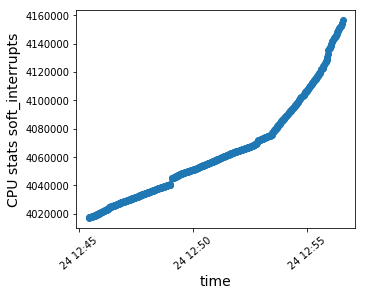

datetime
disk sda busy_time
r 0.578956562637
p 5.44209881943e-55
std error: 0.75785587966


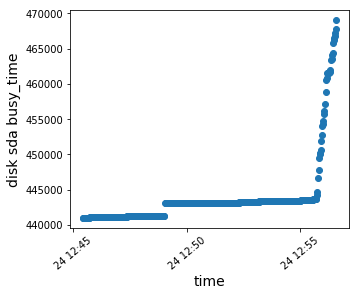

disk sda read_bytes
r 0.662263755135
p 5.31446319778e-77
std error: 5409.57914438


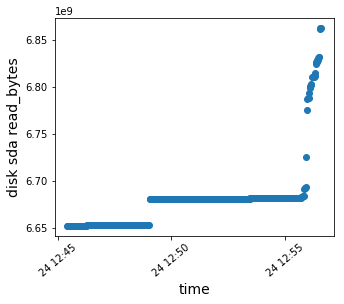

disk sda read_count
r 0.823043011101
p 4.87940828926e-149
std error: 0.284413507928


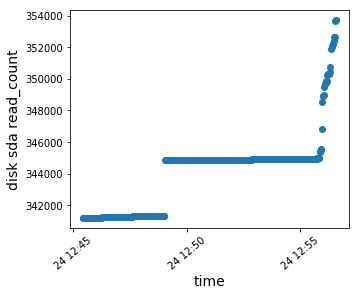

disk sda read_merged_count
r 0.591856014724
p 5.52455600906e-58
std error: 0.917535574769


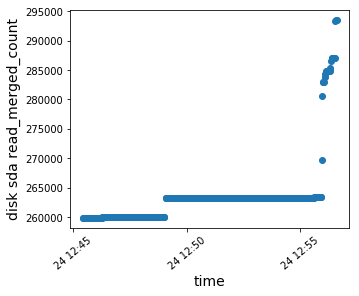

disk sda read_time
r 0.615150058031
p 9.57265439421e-64
std error: 0.527738827013


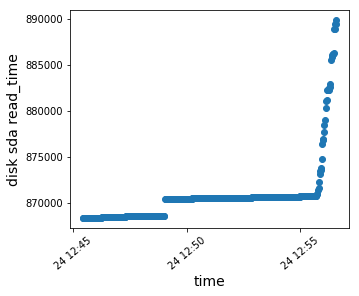

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


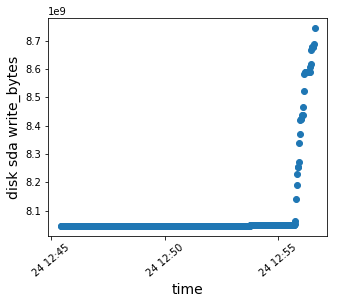

disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


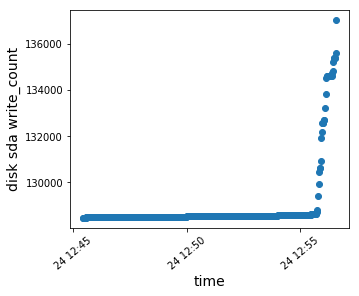

disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


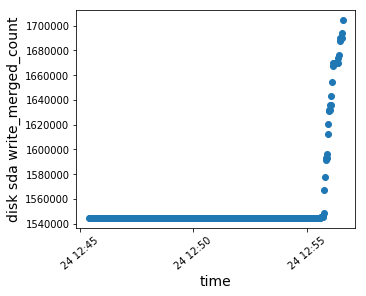

disk sda write_time
r 0.416017700027
p 1.63661006892e-26
std error: 15.8588854848


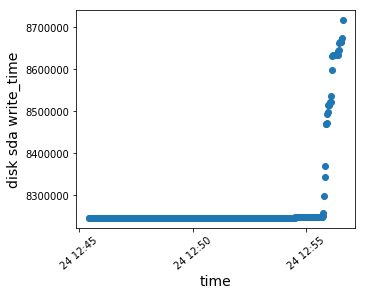

disk sda1 busy_time
r 0.578942372349
p 5.4825966712e-55
std error: 0.75794588102


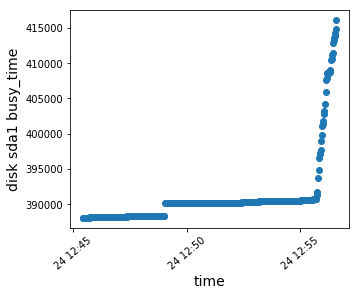

disk sda1 read_bytes
r 0.662248102596
p 5.37359378846e-77
std error: 5410.01748919


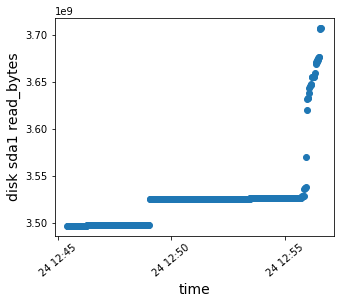

disk sda1 read_count
r 0.823032918992
p 4.95517678689e-149
std error: 0.284432196505


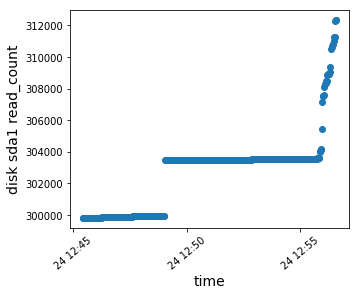

disk sda1 read_merged_count
r 0.59183979737
p 5.57372859884e-58
std error: 0.917626713831


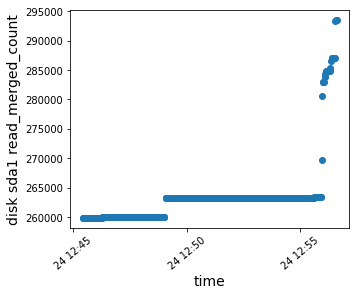

disk sda1 read_time
r 0.615135942894
p 9.65317100938e-64
std error: 0.527790489952


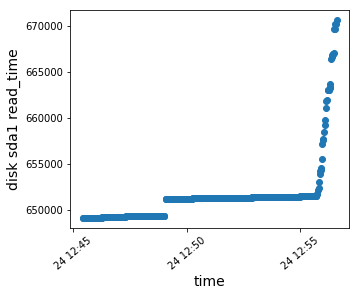

disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


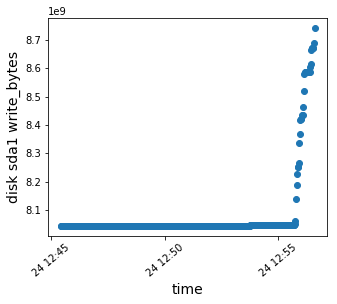

disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


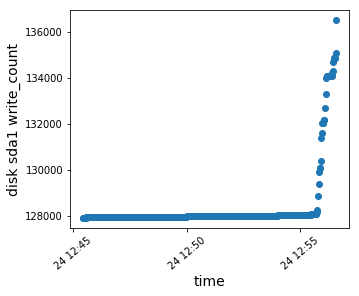

disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


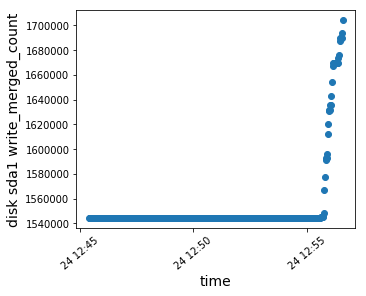

disk sda1 write_time
r 0.416011586006
p 1.63964680652e-26
std error: 15.8610436105


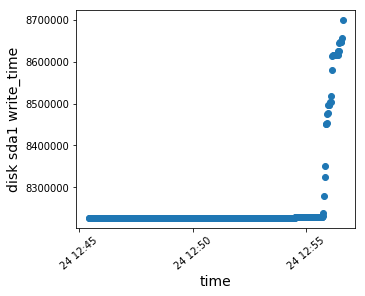

disk sr0 busy_time
r 0.412466555191
p 4.77283539144e-26
std error: 0.00853996213767


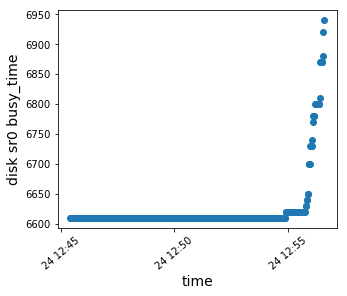

disk sr0 read_bytes
r 0.384217076913
p 1.52640169724e-22
std error: 412.938643469


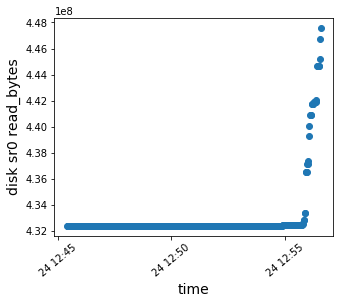

disk sr0 read_count
r 0.401749387609
p 1.11756889639e-24
std error: 0.00636579333357


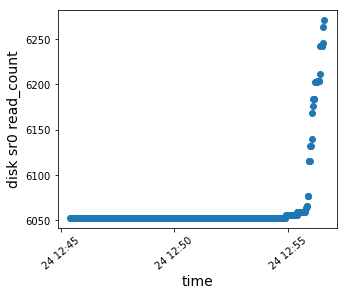

disk sr0 read_time
r 0.410696638693
p 8.09807601495e-26
std error: 0.0153957092152


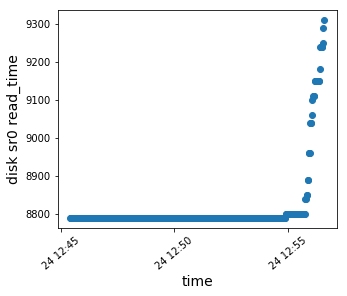

disk sr2 busy_time
r 0.389492905035
p 3.58524183634e-23
std error: 0.0311846713611


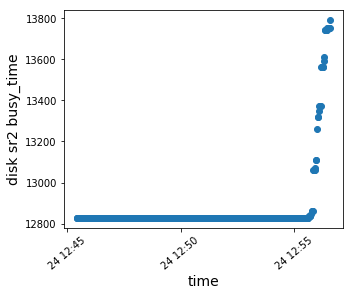

disk sr2 read_bytes
r 0.379301599203
p 5.74959797406e-22
std error: 801.795121282


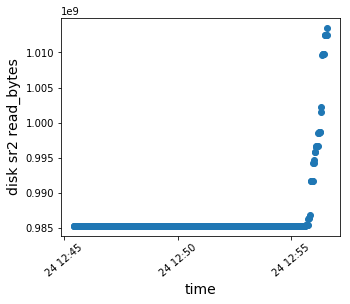

disk sr2 read_count
r 0.387441776347
p 6.31649093342e-23
std error: 0.0174791999279


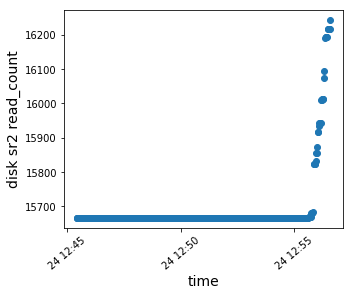

disk sr2 read_merged_count
r 0.248208568444
p 7.09845479753e-10
std error: 2.81415946952e-05


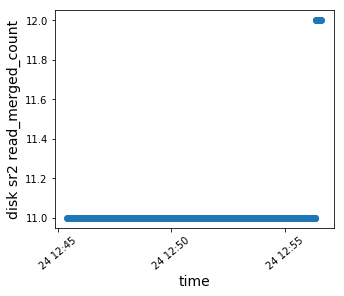

disk sr2 read_time
r 0.390159752587
p 2.97975681268e-23
std error: 0.0952275311833


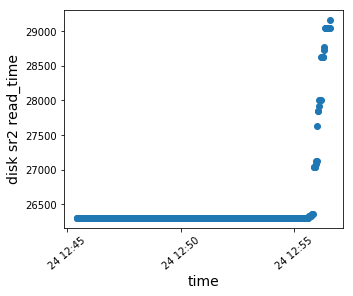

process cpu times: children_system
r -0.465582462843
p 1.3068668593e-33
std error: 2.0993350638e-06


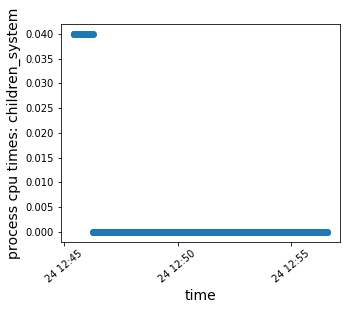

process cpu times: children_user
r -0.486877082145
p 4.89933003131e-37
std error: 9.19634950739e-07


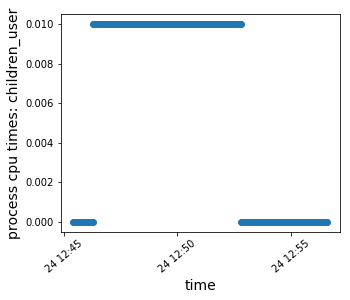

process cpu times: system
r 0.679156667451
p 2.31463971986e-82
std error: 0.000996192882015


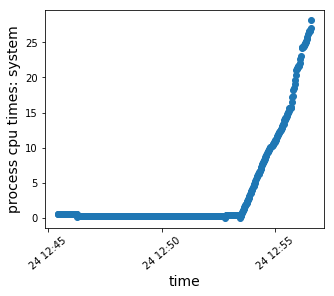

process cpu times: user
r 0.699309756581
p 3.00026538395e-89
std error: 0.00412535413273


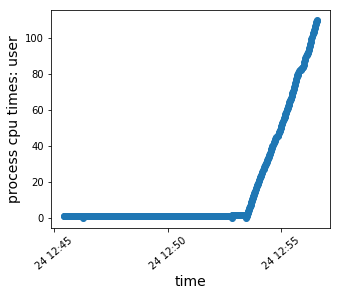

process io counters: read_bytes
r 0.707867883556
p 2.370158586e-92
std error: 126544.814753


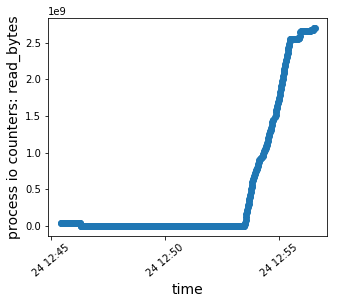

process io counters: read_chars
r 0.714309707237
p 9.21032775668e-95
std error: 123862.638405


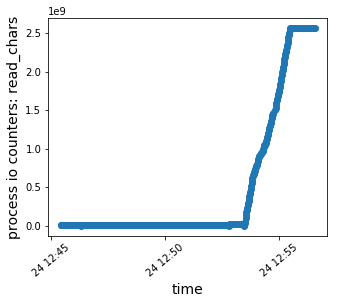

process io counters: read_count
r 0.747275246064
p 3.14108491538e-108
std error: 0.511923057407


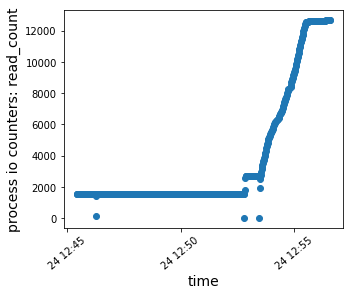

process io counters: write_chars
r 0.802229457469
p 4.44881472923e-136
std error: 13.0878365209


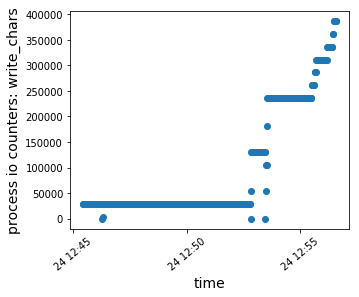

process io counters: write_count
r 0.824244069089
p 7.74279723189e-150
std error: 0.0190132034166


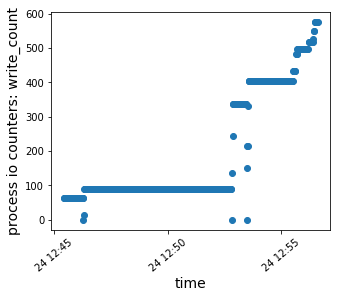

process memory: data
r 0.680762104554
p 6.85746853966e-83
std error: 87657.5698796


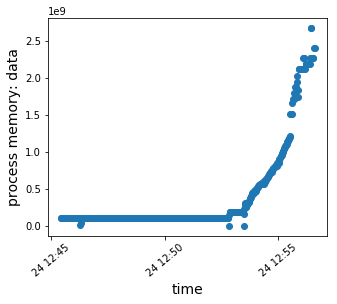

process memory: pss
r 0.683176078688
p 1.08482372952e-83
std error: 76082.2819352


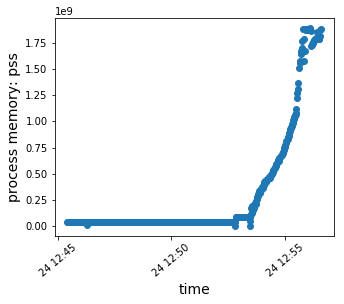

process memory: rss
r 0.686432676105
p 8.76282158549e-85
std error: 75728.998467


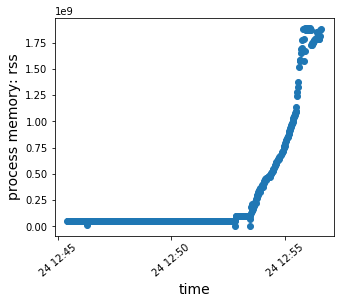

process memory: shared
r 0.430401376003
p 1.87687430912e-28
std error: 1428.53802096


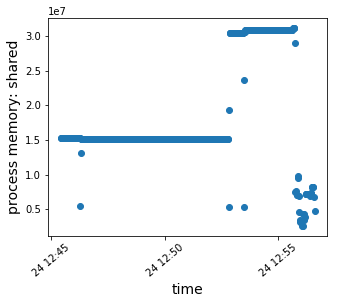

process memory: swap
r 0.3888559996
p 4.27639082428e-23
std error: 12013.7000995


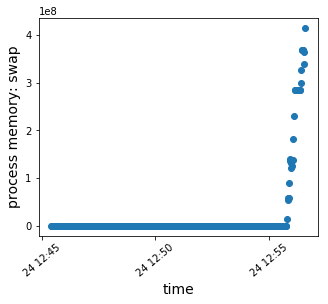

process memory: uss
r 0.680769933763
p 6.81677675818e-83
std error: 76282.5384931


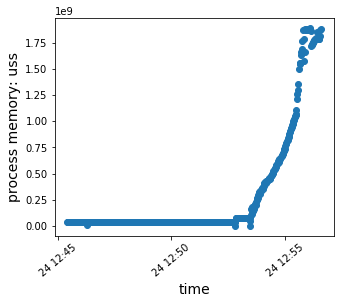

process memory: vms
r 0.718339554803
p 2.64254026947e-96
std error: 92465.4852679


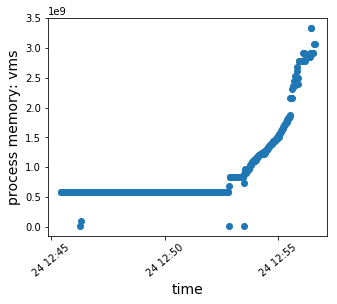

process number context switches: involuntary
r 0.703635726859
p 8.37333620483e-91
std error: 1.43543411671


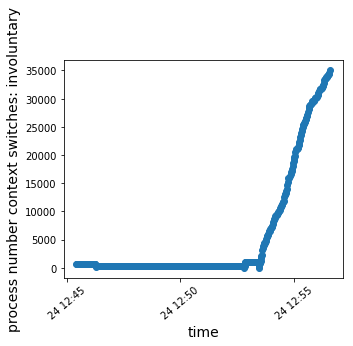

process number context switches: voluntary
r 0.671065650954
p 9.47289948737e-80
std error: 0.654993124045


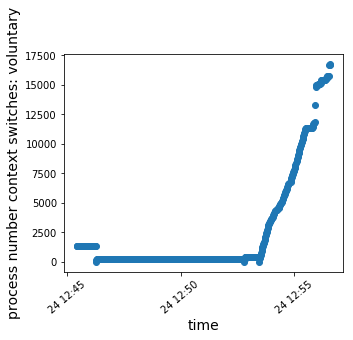

system swap memory free
r -0.349524493569
p 1.10912374444e-18
std error: 18382.2369352


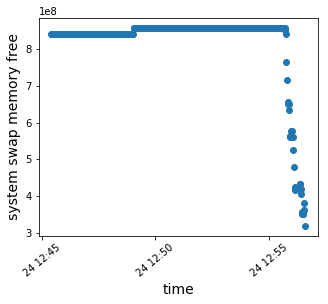

system swap memory percent
r 0.347569891502
p 1.77317312342e-18
std error: 0.00171234912422


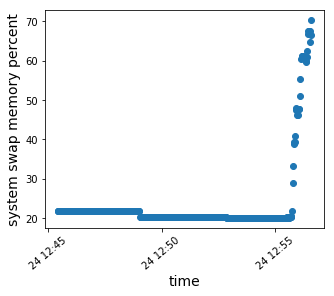

system swap memory sin
r 0.686156955999
p 1.08571513496e-84
std error: 4673.70544548


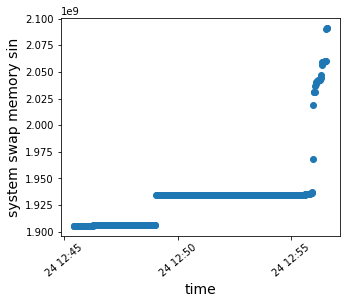

system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


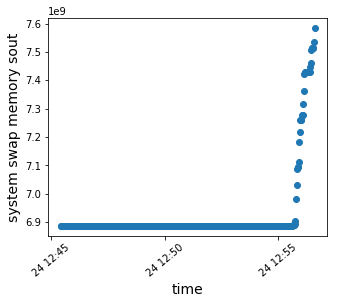

system swap memory used
r 0.349524493569
p 1.10912374444e-18
std error: 18382.2369352


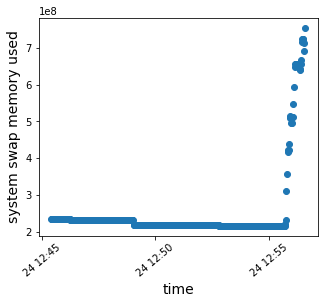

system virtual memory active
r 0.755620223534
p 5.63401161933e-112
std error: 51135.2614484


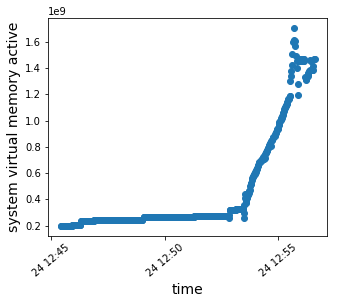

system virtual memory available
r -0.72587225477
p 2.92032256833e-99
std error: 67424.9047538


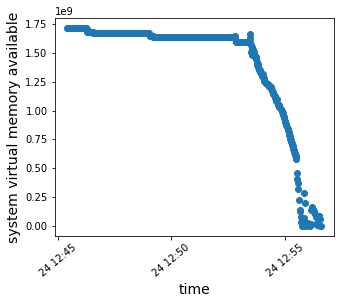

system virtual memory buffers
r -0.43226134335
p 1.03661296279e-28
std error: 805.873034083


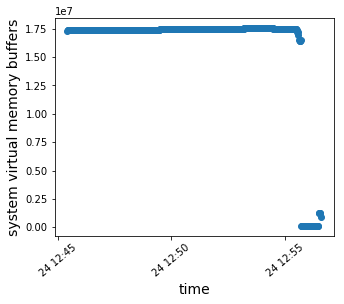

system virtual memory cached
r 0.440753699669
p 6.57545608499e-30
std error: 53630.696918


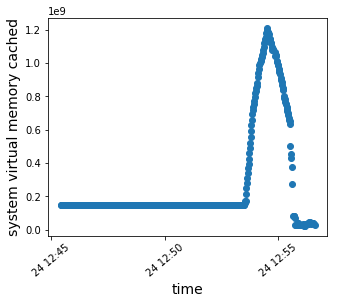

system virtual memory free
r -0.765439505525
p 1.39377275724e-116
std error: 82635.5560793


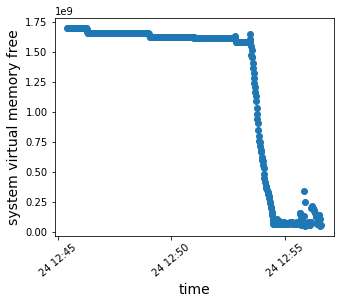

system virtual memory inactive
r 0.641936035259
p 5.3780869789e-71
std error: 46816.7115578


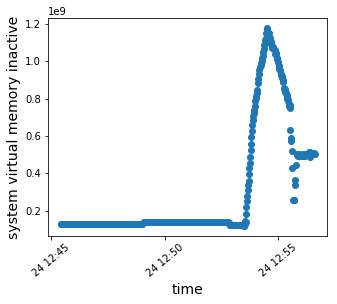

system virtual memory percent
r 0.725873406877
p 2.91723268372e-99
std error: 0.00321634505895


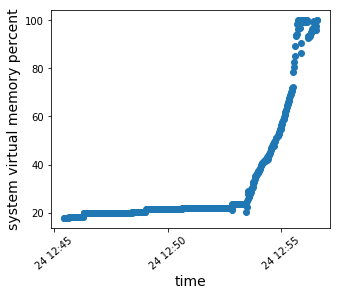

system virtual memory slab
r -0.129027946482
p 0.00153922903374
std error: 543.468902919


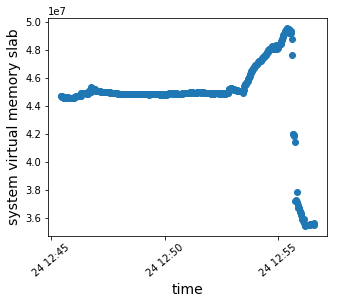

system virtual memory used
r 0.72176981892
p 1.22395521493e-97
std error: 69375.2507123


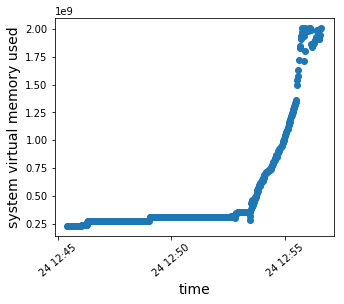

time in unix seconds


In [8]:
list_of_linear_columns=[]
for col_name in df.columns:
    if ('seconds' in col_name) or ('datetime' in col_name):
        print(col_name)
    else:
#        plt.scatter(x=df['time in unix seconds'],y=df[col_name])
        linear_bool = scatter_plot_column(df,col_name)
        if (linear_bool):
            list_of_linear_columns.append(col_name)

# drop columns that are linear

In [9]:
list_of_linear_columns

[]

In [10]:
df = df.drop(list_of_linear_columns, axis=1)
print(df.shape)
df.head()

(600, 76)


,CPU 1 times idle,CPU 1 times iowait,CPU 1 times softirq,CPU 1 times system,CPU 1 times user,CPU 2 times idle,CPU 2 times iowait,CPU 2 times softirq,CPU 2 times system,CPU 2 times user,...,system virtual memory active,system virtual memory available,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory slab,system virtual memory used,time in unix seconds
0,62.8,0.6,0.0,12.8,23.8,77.1,0.0,0.0,7.8,15.1,...,198971392,1718231040,17334272,150708224,1696976896,129146880,18.0,44695552,231145472,1.553432e+09
1,97.1,0.0,0.0,1.0,2.0,98.1,1.0,0.0,1.0,0.0,...,199041024,1718239232,17346560,150716416,1696976896,129155072,18.0,44732416,231124992,1.553432e+09
2,94.3,0.0,0.0,0.9,4.7,99.1,0.0,0.0,0.0,0.9,...,199041024,1718239232,17346560,150716416,1696976896,129155072,18.0,44732416,231124992,1.553432e+09
3,96.1,0.0,0.0,1.0,2.9,99.0,0.0,0.0,0.0,1.0,...,199110656,1718288384,17346560,150712320,1697017856,129155072,18.0,44658688,231088128,1.553432e+09
4,96.2,0.0,0.0,1.0,2.9,100.0,0.0,0.0,0.0,0.0,...,199110656,1718161408,17346560,150708224,1696890880,129155072,18.0,44654592,231219200,1.553432e+09


# find correlated columns and drop all but one of the correlated columns

https://stackoverflow.com/questions/39409866/correlation-heatmap


In [11]:
df.columns

Index(['CPU 1 times idle', 'CPU 1 times iowait', 'CPU 1 times softirq',
       'CPU 1 times system', 'CPU 1 times user', 'CPU 2 times idle',
       'CPU 2 times iowait', 'CPU 2 times softirq', 'CPU 2 times system',
       'CPU 2 times user', 'CPU percent for 0', 'CPU percent for 1',
       'CPU stats ctx_switches', 'CPU stats interrupts',
       'CPU stats soft_interrupts', 'datetime', 'disk sda busy_time',
       'disk sda read_bytes', 'disk sda read_count',
       'disk sda read_merged_count', 'disk sda read_time',
       'disk sda write_bytes', 'disk sda write_count',
       'disk sda write_merged_count', 'disk sda write_time',
       'disk sda1 busy_time', 'disk sda1 read_bytes', 'disk sda1 read_count',
       'disk sda1 read_merged_count', 'disk sda1 read_time',
       'disk sda1 write_bytes', 'disk sda1 write_count',
       'disk sda1 write_merged_count', 'disk sda1 write_time',
       'disk sr0 busy_time', 'disk sr0 read_bytes', 'disk sr0 read_count',
       'disk sr0 read_time'

evaluate correlation for one pair

In [12]:
df['CPU 1 times idle'].corr(df['process memory: rss'])

-0.79864574250544584

calculate the correlation matrix

In [13]:
corr = df.corr()
corr.head()

,CPU 1 times idle,CPU 1 times iowait,CPU 1 times softirq,CPU 1 times system,CPU 1 times user,CPU 2 times idle,CPU 2 times iowait,CPU 2 times softirq,CPU 2 times system,CPU 2 times user,...,system virtual memory active,system virtual memory available,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory slab,system virtual memory used,time in unix seconds
CPU 1 times idle,1.000000,-0.570973,-0.493919,-0.837392,-0.869479,0.792558,-0.421390,-0.376350,-0.829640,-0.616292,...,-0.856531,0.816018,0.490957,-0.611840,0.914703,-0.826715,-0.816056,0.130222,-0.811540,-0.709827
CPU 1 times iowait,-0.570973,1.000000,0.352422,0.358635,0.428521,-0.385262,0.309961,0.165043,0.479214,0.217288,...,0.394752,-0.375191,-0.248789,0.403722,-0.477435,0.498284,0.375204,-0.037664,0.373233,0.355801
CPU 1 times softirq,-0.493919,0.352422,1.000000,0.595319,0.183467,-0.444600,0.193445,0.629224,0.489810,0.325102,...,0.546935,-0.600724,-0.711994,-0.056229,-0.443105,0.235372,0.600746,-0.595513,0.607546,0.361609
CPU 1 times system,-0.837392,0.358635,0.595319,1.000000,0.492095,-0.834302,0.508506,0.385283,0.792375,0.676259,...,0.775014,-0.741168,-0.461875,0.545939,-0.826240,0.744766,0.741230,-0.089743,0.737229,0.628112
CPU 1 times user,-0.869479,0.428521,0.183467,0.492095,1.000000,-0.558068,0.205556,0.234378,0.635627,0.435189,...,0.710899,-0.667121,-0.346130,0.527135,-0.759793,0.687355,0.667134,-0.084532,0.662278,0.603978


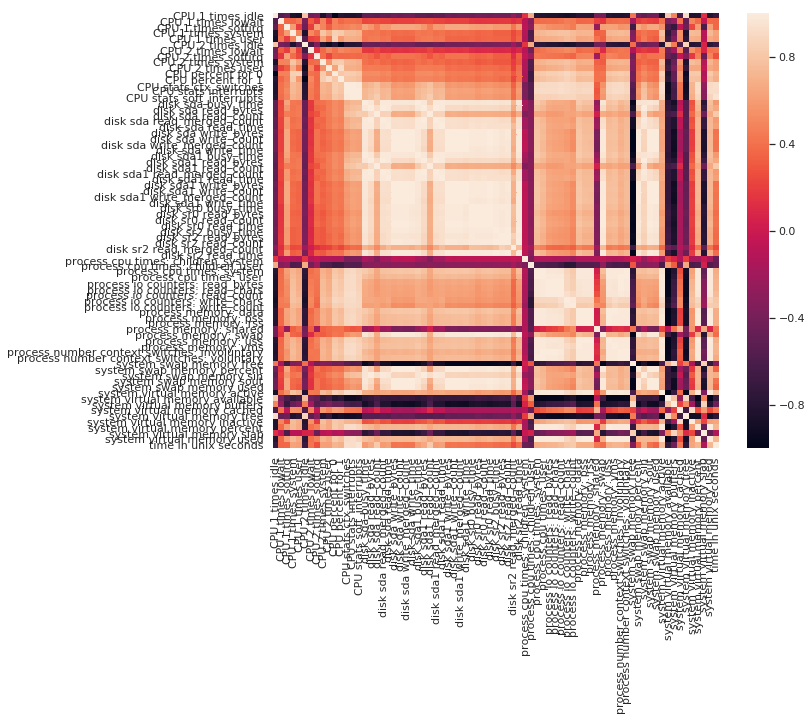

In [14]:
seaborn.set(rc={'figure.figsize':(10,8)})
# plot the heatmap 
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
_=seaborn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)#, annot=True)

# diagonal is 1, indicating perfect correlation
# black means anti-correlated

which columns are correlated?

In [15]:
type(corr)

pandas.core.frame.DataFrame

In [16]:
# https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Select upper triangle of correlation matrix
upper = corr.where(numpy.triu(numpy.ones(corr.shape), k=1).astype(numpy.bool))
#upper.head()

disk sda write_count | disk sda write_bytes | 0.999240366624
disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


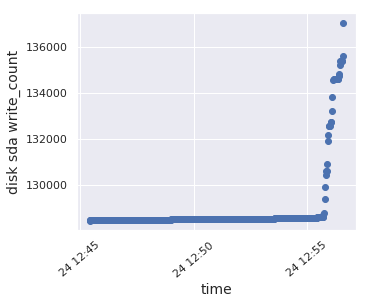

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


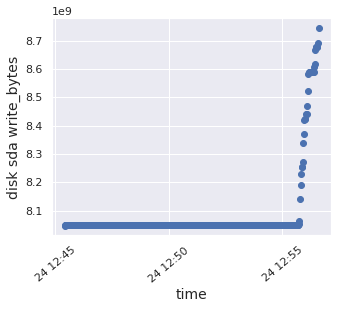

disk sda write_merged_count | disk sda write_bytes | 0.999962580918
disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


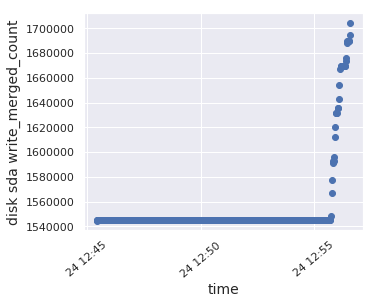

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


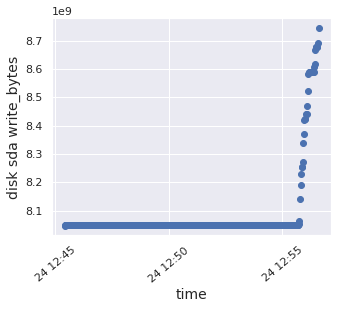

disk sda write_merged_count | disk sda write_count | 0.999089784237
disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


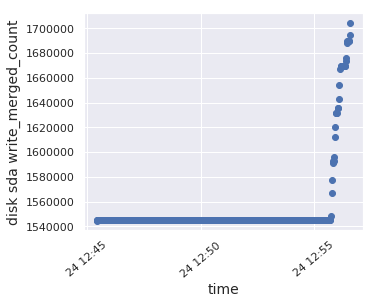

disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


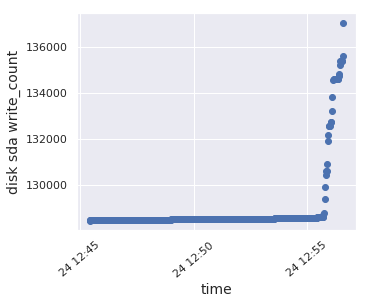

disk sda1 busy_time | disk sda busy_time | 0.999999965324
disk sda1 busy_time
r 0.578942372349
p 5.4825966712e-55
std error: 0.75794588102


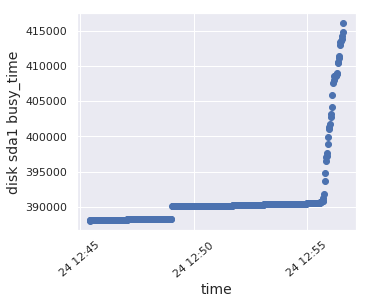

disk sda busy_time
r 0.578956562637
p 5.44209881943e-55
std error: 0.75785587966


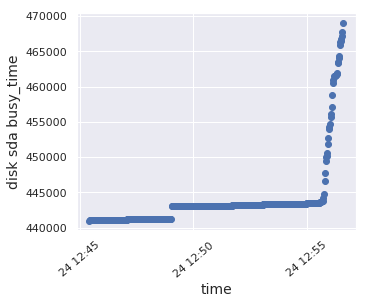

disk sda1 read_bytes | disk sda read_bytes | 0.999999947165
disk sda1 read_bytes
r 0.662248102596
p 5.37359378846e-77
std error: 5410.01748919


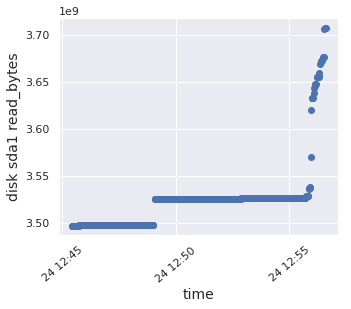

disk sda read_bytes
r 0.662263755135
p 5.31446319778e-77
std error: 5409.57914438


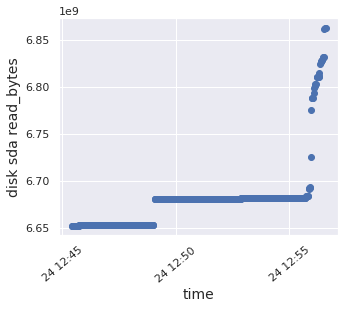

disk sda1 read_count | disk sda read_count | 0.999999973143
disk sda1 read_count
r 0.823032918992
p 4.95517678689e-149
std error: 0.284432196505


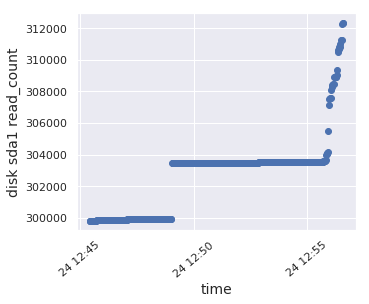

disk sda read_count
r 0.823043011101
p 4.87940828926e-149
std error: 0.284413507928


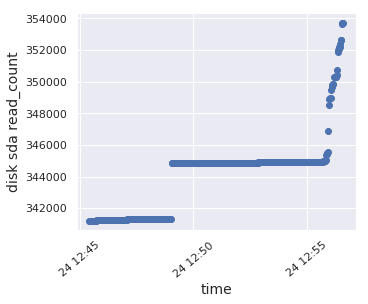

disk sda1 read_merged_count | disk sda read_merged_count | 0.99999990551
disk sda1 read_merged_count
r 0.59183979737
p 5.57372859884e-58
std error: 0.917626713831


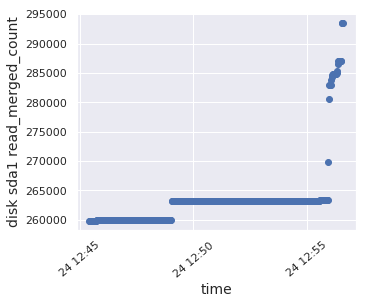

disk sda read_merged_count
r 0.591856014724
p 5.52455600906e-58
std error: 0.917535574769


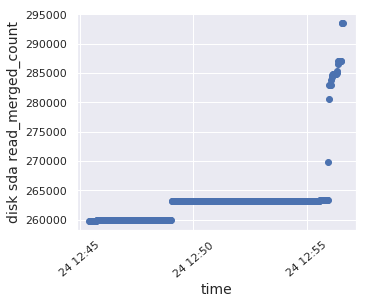

disk sda1 read_time | disk sda read_time | 0.999999916546
disk sda1 read_time
r 0.615135942894
p 9.65317100938e-64
std error: 0.527790489952


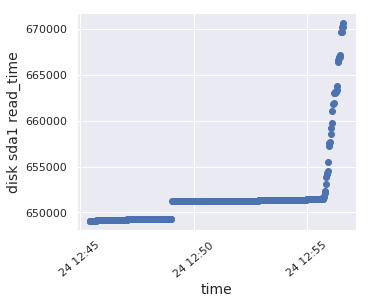

disk sda read_time
r 0.615150058031
p 9.57265439421e-64
std error: 0.527738827013


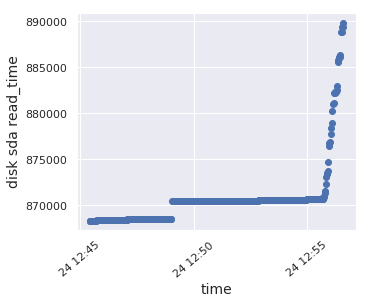

disk sda1 write_bytes | disk sda write_bytes | 0.99999989087
disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


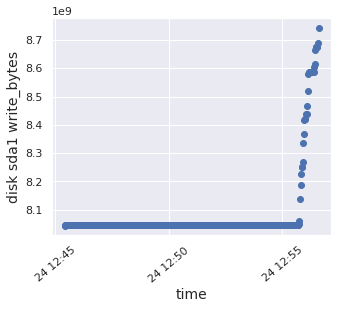

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


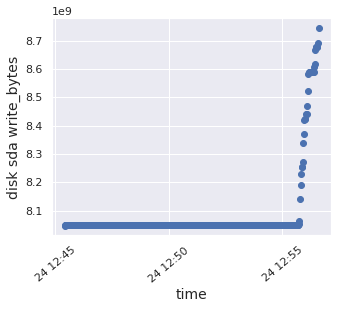

disk sda1 write_bytes | disk sda write_count | 0.999241808771
disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


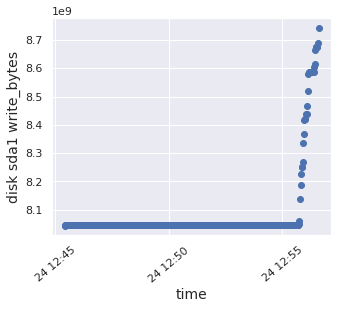

disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


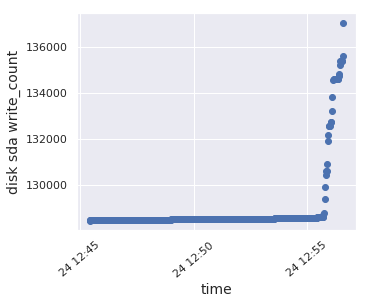

disk sda1 write_bytes | disk sda write_merged_count | 0.999963459365
disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


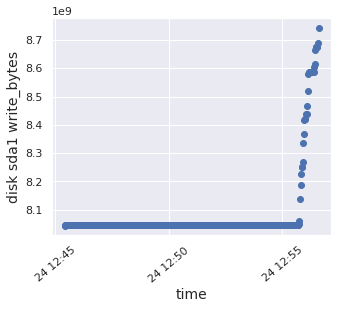

disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


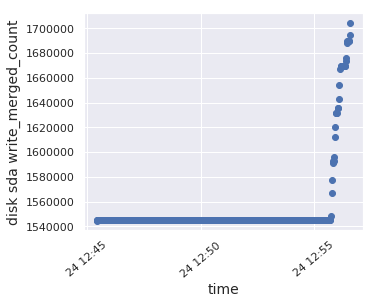

disk sda1 write_count | disk sda write_bytes | 0.999228417795
disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


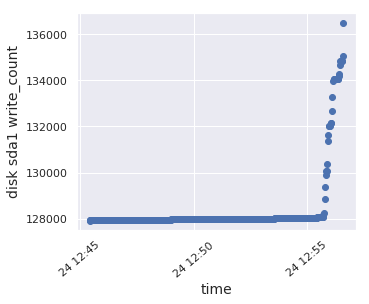

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


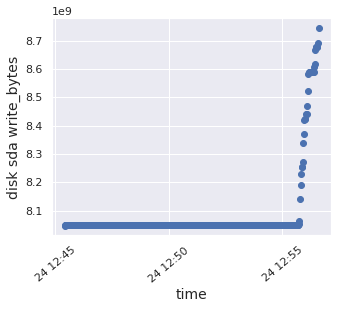

disk sda1 write_count | disk sda write_count | 0.999999847957
disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


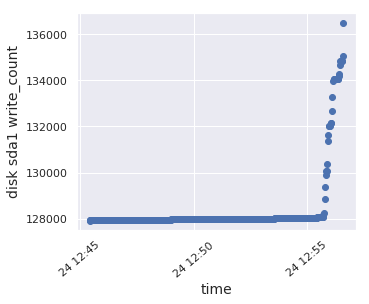

disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


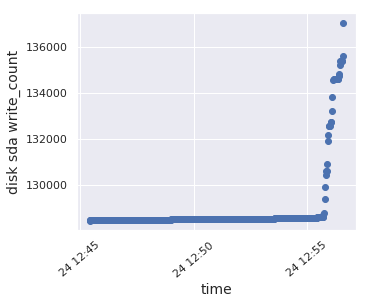

disk sda1 write_count | disk sda write_merged_count | 0.999077595075
disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


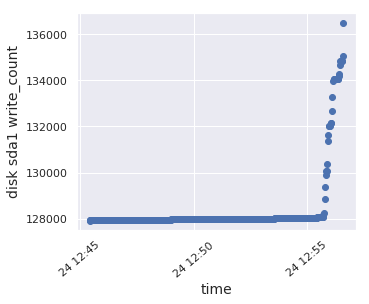

disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


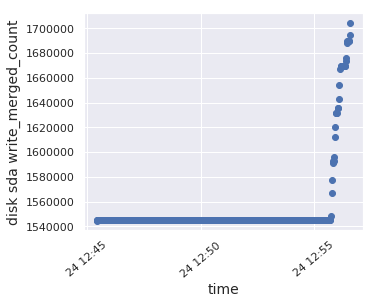

disk sda1 write_count | disk sda1 write_bytes | 0.999230017126
disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


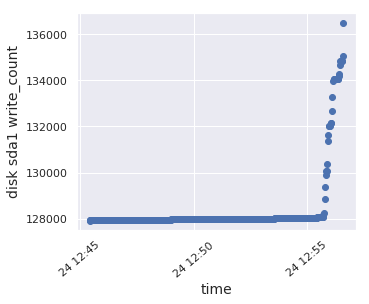

disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


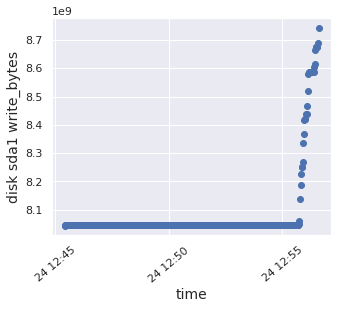

disk sda1 write_merged_count | disk sda write_bytes | 0.999961930042
disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


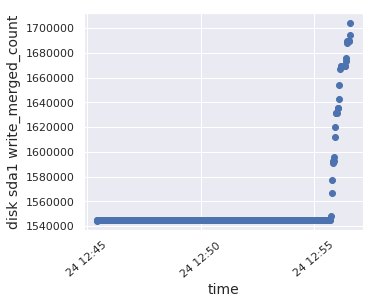

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


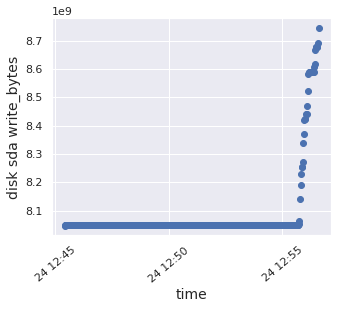

disk sda1 write_merged_count | disk sda write_count | 0.99909076658
disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


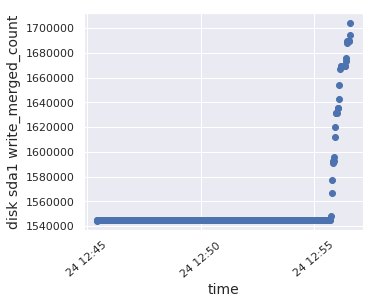

disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


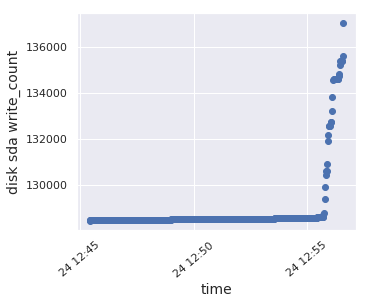

disk sda1 write_merged_count | disk sda write_merged_count | 0.999999960929
disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


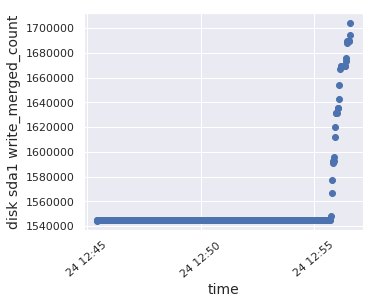

disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


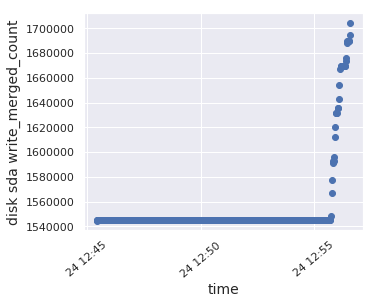

disk sda1 write_merged_count | disk sda1 write_bytes | 0.999962810237
disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


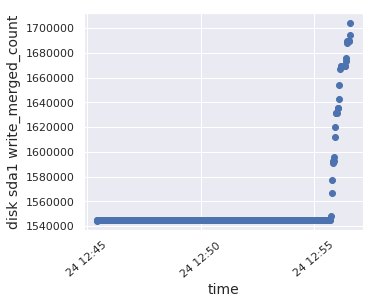

disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


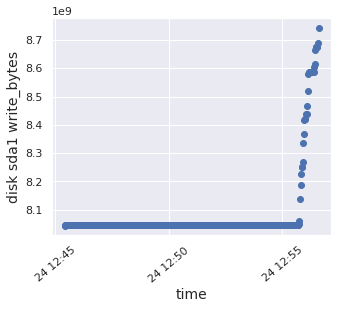

disk sda1 write_merged_count | disk sda1 write_count | 0.999078597985
disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


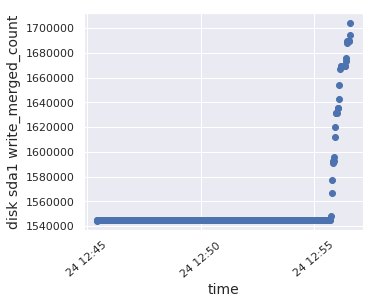

disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


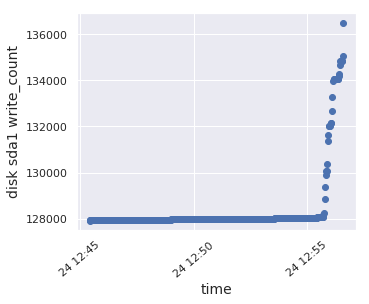

disk sda1 write_time | disk sda write_time | 0.999999869331
disk sda1 write_time
r 0.416011586006
p 1.63964680652e-26
std error: 15.8610436105


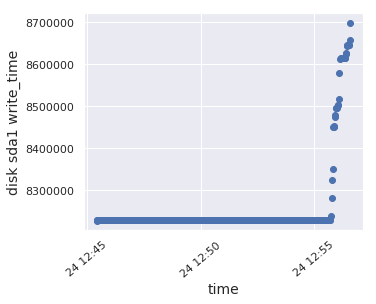

disk sda write_time
r 0.416017700027
p 1.63661006892e-26
std error: 15.8588854848


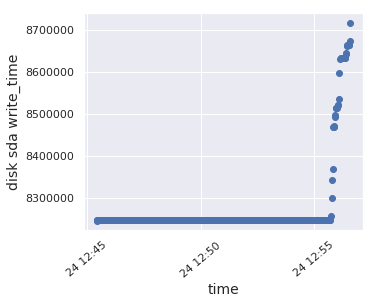

disk sr2 read_time | disk sr2 busy_time | 0.999545140688
disk sr2 read_time
r 0.390159752587
p 2.97975681268e-23
std error: 0.0952275311833


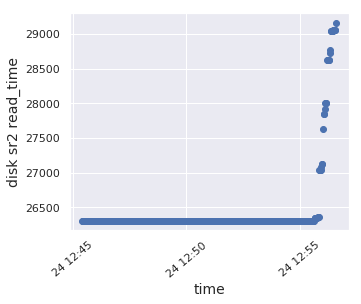

disk sr2 busy_time
r 0.389492905035
p 3.58524183634e-23
std error: 0.0311846713611


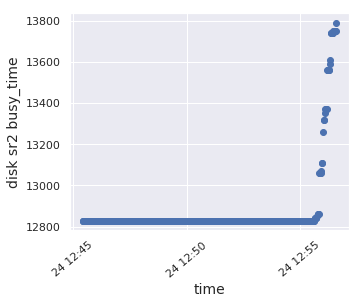

process io counters: read_chars | process io counters: read_bytes | 0.999636721112
process io counters: read_chars
r 0.714309707237
p 9.21032775668e-95
std error: 123862.638405


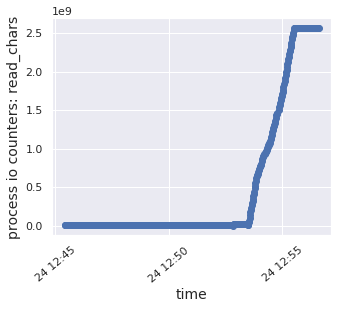

process io counters: read_bytes
r 0.707867883556
p 2.370158586e-92
std error: 126544.814753


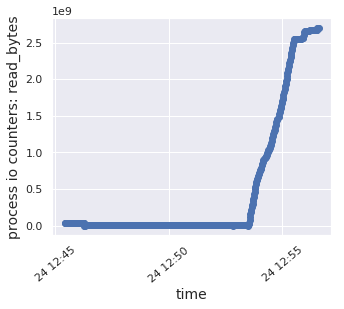

process memory: rss | process memory: pss | 0.999951351456
process memory: rss
r 0.686432676105
p 8.76282158549e-85
std error: 75728.998467


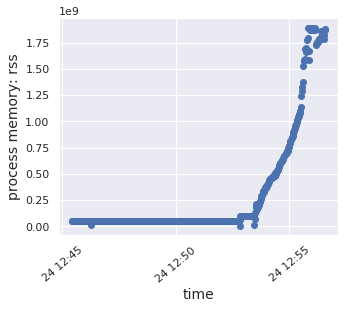

process memory: pss
r 0.683176078688
p 1.08482372952e-83
std error: 76082.2819352


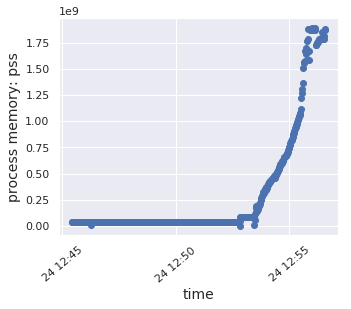

process memory: uss | process memory: pss | 0.999977524782
process memory: uss
r 0.680769933763
p 6.81677675818e-83
std error: 76282.5384931


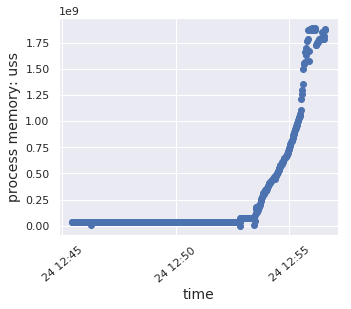

process memory: pss
r 0.683176078688
p 1.08482372952e-83
std error: 76082.2819352


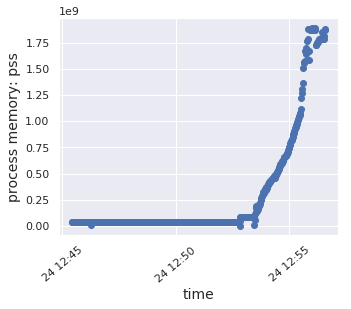

process memory: uss | process memory: rss | 0.999882378325
process memory: uss
r 0.680769933763
p 6.81677675818e-83
std error: 76282.5384931


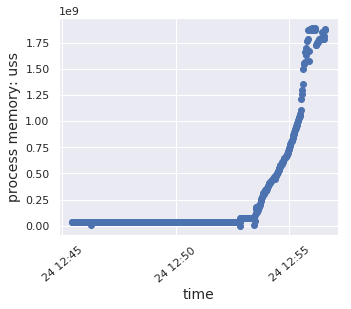

process memory: rss
r 0.686432676105
p 8.76282158549e-85
std error: 75728.998467


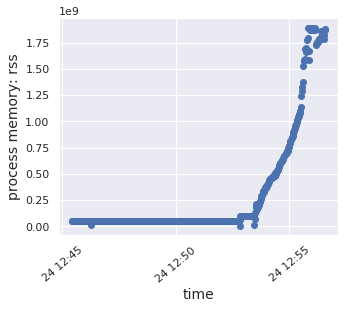

system swap memory sout | disk sda write_bytes | 0.999964002778
system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


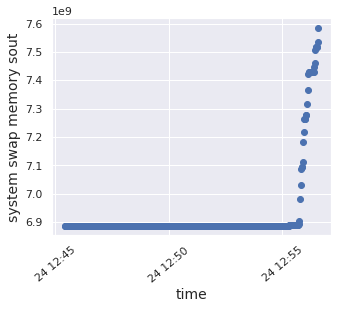

disk sda write_bytes
r 0.411671984101
p 6.05373186109e-26
std error: 22522.1232538


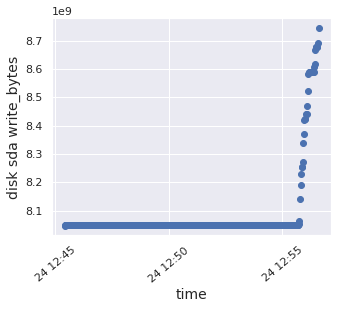

system swap memory sout | disk sda write_count | 0.999166378305
system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


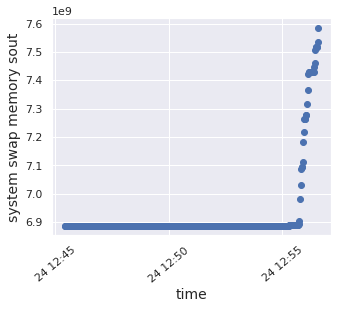

disk sda write_count
r 0.429010202437
p 2.9189591642e-28
std error: 0.248408412215


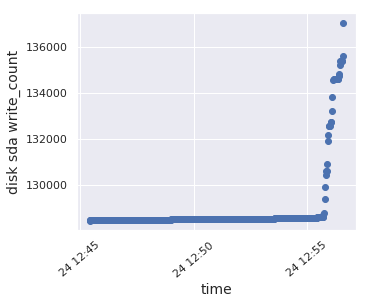

system swap memory sout | disk sda write_merged_count | 0.999995116907
system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


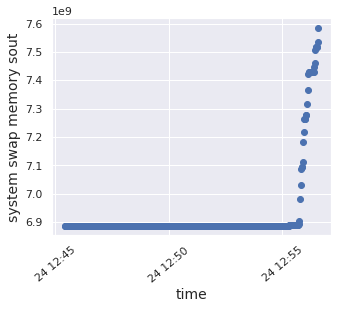

disk sda write_merged_count
r 0.411244203216
p 6.87851338333e-26
std error: 5.19826389549


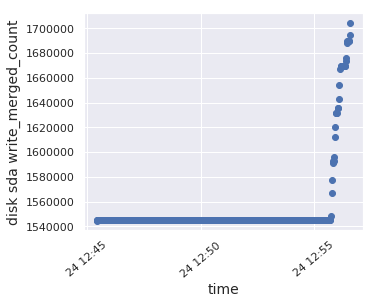

system swap memory sout | disk sda1 write_bytes | 0.999964997768
system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


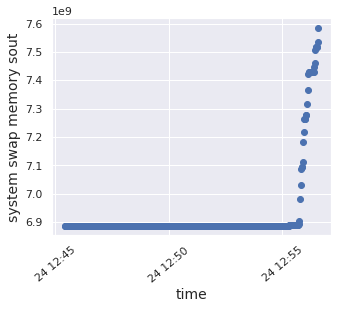

disk sda1 write_bytes
r 0.411666638054
p 6.06340964363e-26
std error: 22525.4903809


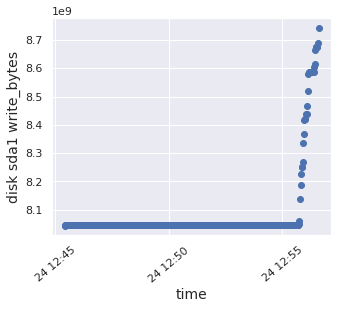

system swap memory sout | disk sda1 write_count | 0.999154957026
system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


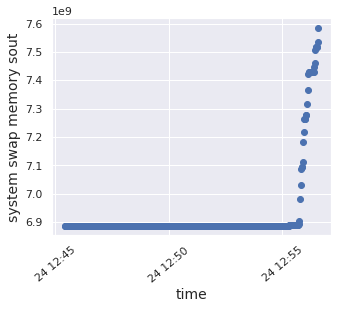

disk sda1 write_count
r 0.428987605714
p 2.93992291674e-28
std error: 0.248467313038


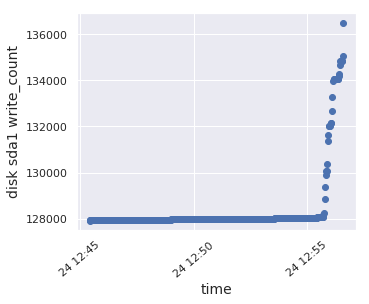

system swap memory sout | disk sda1 write_merged_count | 0.999995267569
system swap memory sout
r 0.410930933828
p 7.55207385753e-26
std error: 22569.3188423


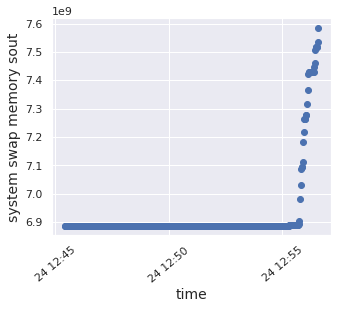

disk sda1 write_merged_count
r 0.411255740933
p 6.85487457808e-26
std error: 5.1985761412


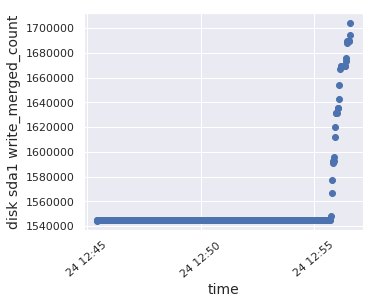

system swap memory used | system swap memory percent | 0.999994292829
system swap memory used
r 0.349524493569
p 1.10912374444e-18
std error: 18382.2369352


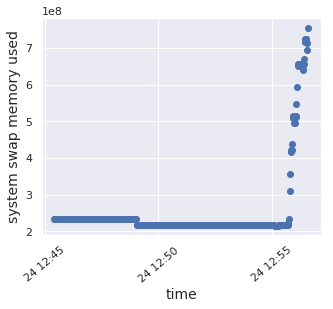

system swap memory percent
r 0.347569891502
p 1.77317312342e-18
std error: 0.00171234912422


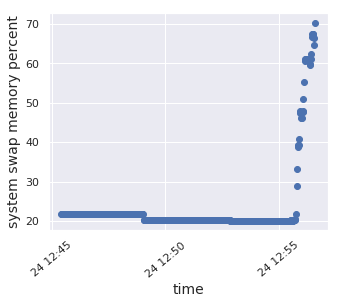

system virtual memory used | system virtual memory percent | 0.999851970609
system virtual memory used
r 0.72176981892
p 1.22395521493e-97
std error: 69375.2507123


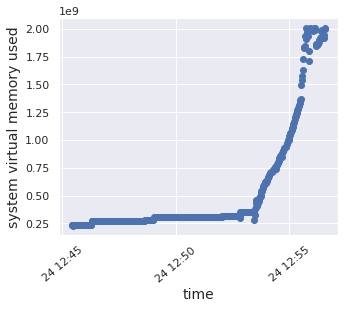

system virtual memory percent
r 0.725873406877
p 2.91723268372e-99
std error: 0.00321634505895


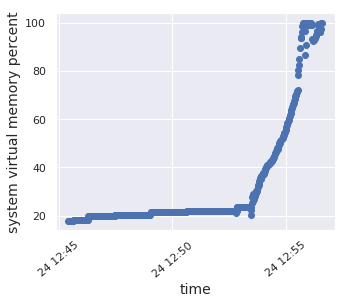

In [17]:
for column in upper.columns:
    #print('column:',column)
    for row in upper.index:
        #print('row:',row)
        #print(upper[column].loc[row])
        if (upper[column].loc[row] > 0.999):
            print(column,'|',row,'|',upper[column].loc[row])
            _=scatter_plot_column(df,column)
            _=scatter_plot_column(df,row)

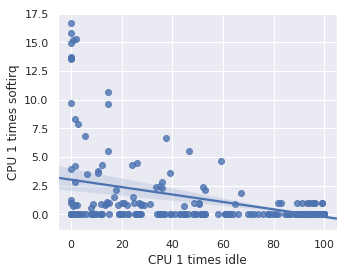

In [18]:
seaborn.set(rc={'figure.figsize':(5,4)})
_=seaborn.regplot(x=df['CPU 1 times idle'], y=df['CPU 1 times softirq'])